PRAW is a **Python wrapper for the Reddit API**, which enables you to scrape data from subreddits, create a bot and much more.

In [1]:
!pip install praw

### 1. Set Up

In [17]:
import pandas as pd              
import numpy as np
import matplotlib.pyplot as plt
import praw
import datetime

In [18]:
def get_date(submission):
    time = submission.created
    return datetime.datetime.fromtimestamp(time)

https://www.reddit.com/prefs/apps

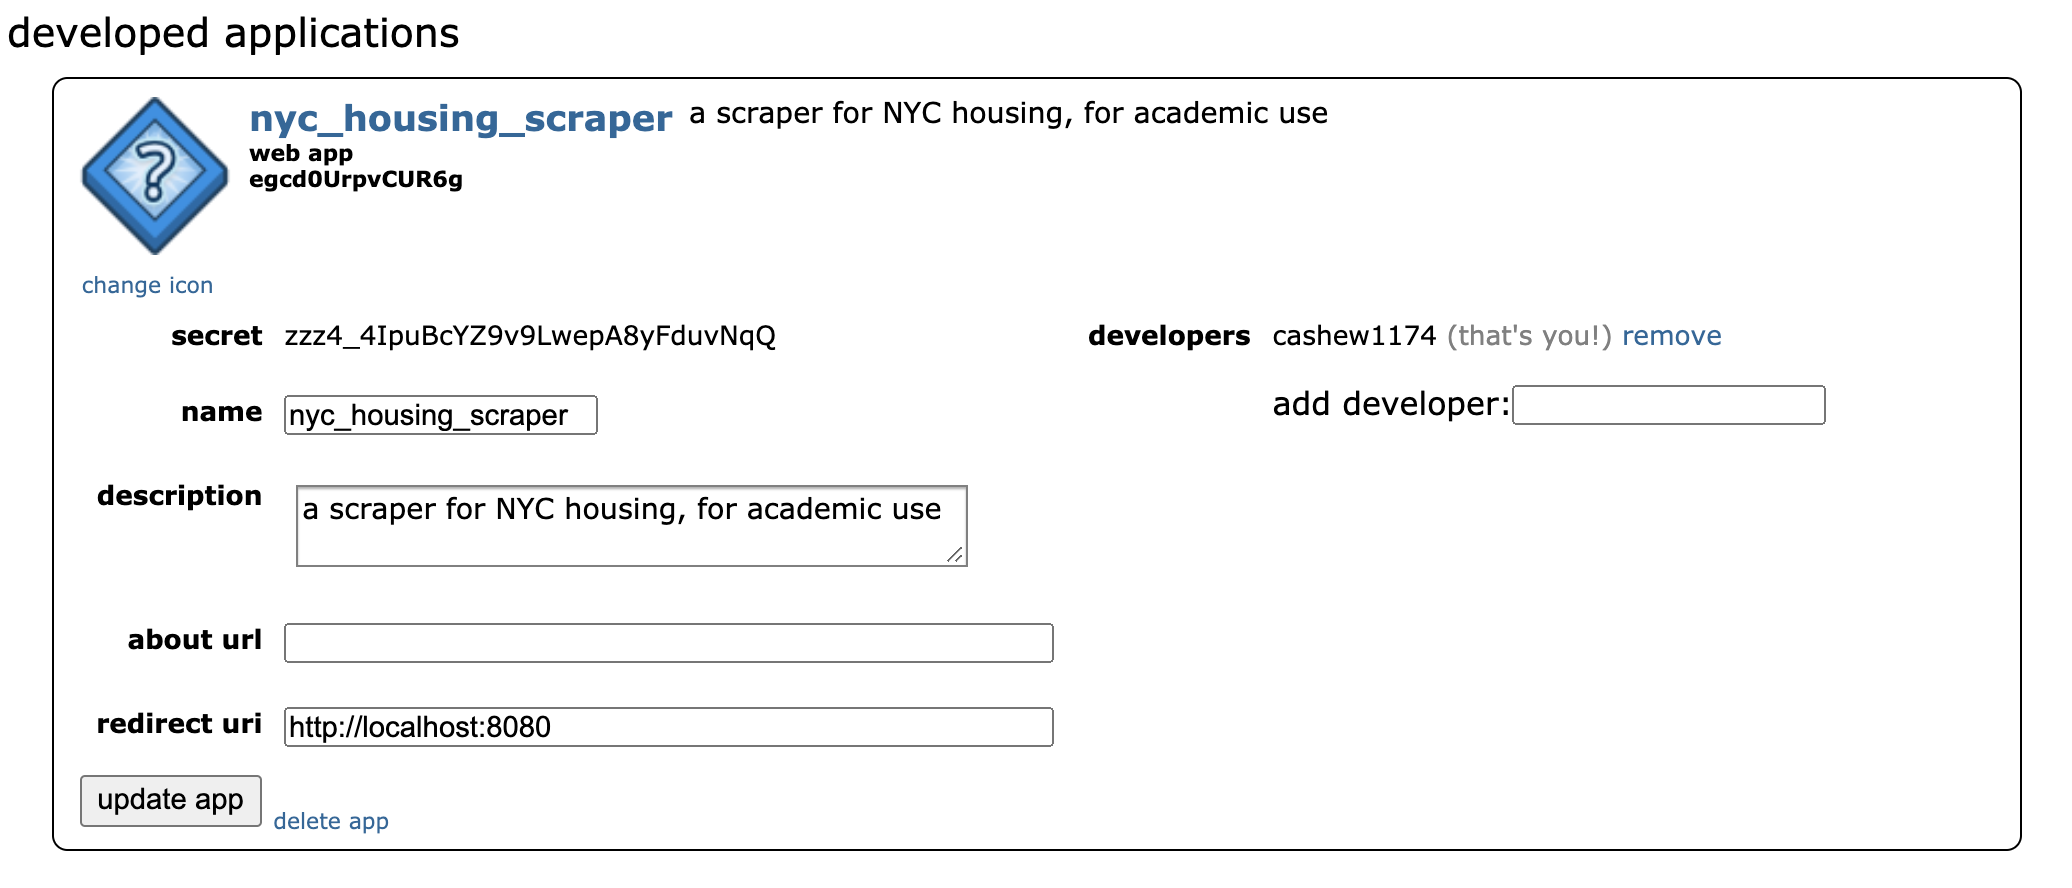

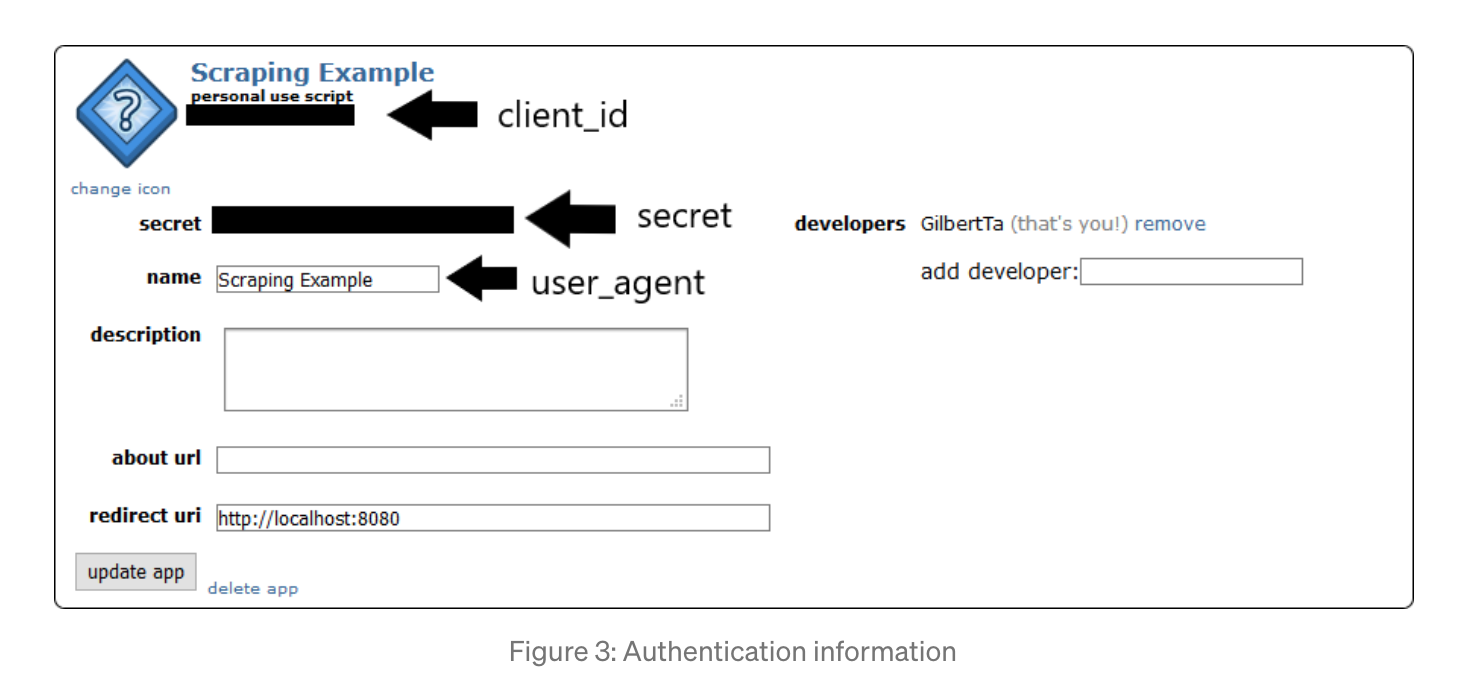

In [3]:
reddit = praw.Reddit(client_id='egcd0UrpvCUR6g', 
                     client_secret='zzz4_4IpuBcYZ9v9LwepA8yFduvNqQ', 
                     user_agent='nyc_housing_scraper')

### 2. Example: Get Subreddit Data

In [4]:
# get 10 hot posts from the MachineLearning subreddit
hot_posts = reddit.subreddit('MachineLearning').hot(limit=10)
for post in hot_posts:
    print(post.title)

[D] Simple Questions Thread December 20, 2020
[D] Machine Learning - WAYR (What Are You Reading) - Week 102
[D] Bayesian Statistical Learning or Approximation, Algorithms and Heuristics
[N] DOT paid $365k for a model that used the null data as the negative data. And didn’t realize it for 5 years while they used it.
[D] - Finding a Common Bass Line in Vanilla Ice’s “Ice Ice Baby” and Queen/David Bowie’s “Under Pressure”
[N] Yannic Kilcher "AI Pop Science"
[R] Solving Mixed Integer Programs Using Neural Networks
[D] Christmas gift! Deep Learning Interviews is free to download!!!
[Discussion] When to use SMOTE or ADASYN - Before or after train test split for Imbalanced Classes
[D] - Tutorial Series: Modern Time Series Analysis with STUMPY


In [5]:
# get hottest posts from all subreddits
hot_posts = reddit.subreddit('all').hot(limit=10)
for post in hot_posts:
    print(post.title)

Haoko the Gorilla loves spending time with his kids, but his missus doesn't allow it when they're too young, so he "abducts" them, forcing the mom into a harmless, playful chase. It's sort of a family tradition, as he did it with all 3 of his kids
TIL a field of seagrass converts carbon dioxide to oxygen at over 8x the rate of a forest the same size.
Got my dream microwave. Plugged it and.... it’s possessed.
This is the real America. The one you don't hear about on the news. Its people are beautiful.
Dad let him open every present then brought ps5
Repost but a classic
Me_irl
How powerful will I become?
PC Master Race hur hur
Capitalist hustle


In [6]:
import pandas as pd
posts = []
ml_subreddit = reddit.subreddit('MachineLearning')
for post in ml_subreddit.hot(limit=10):
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, post.created])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])
print(posts)

                                               title  score      id  \
0      [D] Simple Questions Thread December 20, 2020      4  kh2b81   
1  [D] Machine Learning - WAYR (What Are You Read...      4  kh27nx   
2  [D] Bayesian Statistical Learning or Approxima...     61  kk4zkh   
3  [N] DOT paid $365k for a model that used the n...    684  kjpsyq   
4  [D] - Finding a Common Bass Line in Vanilla Ic...      8  kk6p3f   
5                [N] Yannic Kilcher "AI Pop Science"     25  kjz2i4   
6  [R] Solving Mixed Integer Programs Using Neura...     36  kjur2e   
7  [D] Christmas gift! Deep Learning Interviews i...     29  kjve97   
8  [Discussion] When to use SMOTE or ADASYN - Bef...      6  kjydvl   
9  [D] - Tutorial Series: Modern Time Series Anal...      4  kk27q1   

         subreddit                                                url  \
0  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   
1  MachineLearning  https://www.reddit.com/r/MachineLearning/comme...   

In [7]:
# get MachineLearning subreddit data
ml_subreddit = reddit.subreddit('MachineLearning')

print(ml_subreddit.description)

**[Rules For Posts](https://www.reddit.com/r/MachineLearning/about/rules/)**
--------
+[Research](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AResearch)
--------
+[Discussion](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ADiscussion)
--------
+[Project](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3AProject)
--------
+[News](https://www.reddit.com/r/MachineLearning/search?sort=new&restrict_sr=on&q=flair%3ANews)
--------
***[@slashML on Twitter](https://twitter.com/slashML)***
--------
***[Chat with us on Slack](https://join.slack.com/t/rml-talk/shared_invite/enQtNjkyMzI3NjA2NTY2LWY0ZmRjZjNhYjI5NzYwM2Y0YzZhZWNiODQ3ZGFjYmI2NTU3YjE1ZDU5MzM2ZTQ4ZGJmOTFmNWVkMzFiMzVhYjg)***
--------
**Beginners:**
--------
Please have a look at [our FAQ and Link-Collection](http://www.reddit.com/r/MachineLearning/wiki/index)

[Metacademy](http://www.metacademy.org) is a great resource which compiles le

In [8]:
submission = reddit.submission(url="https://www.reddit.com/r/MapPorn/comments/a3p0uq/an_image_of_gps_tracking_of_multiple_wolves_in/")
# or 
submission = reddit.submission(id="a3p0uq")

In [9]:
for top_level_comment in submission.comments:
    print(top_level_comment.body)

Source: [https://www.facebook.com/VoyageursWolfProject/](https://www.facebook.com/VoyageursWolfProject/)
I thought this was a shit post made in paint before I read the title
Wow, that’s very cool.  To think how keen their senses must be to recognize and avoid each other and their territories.  Plus, I like to think that there’s one from the white colored clan who just goes way into the other territories because, well, he’s a badass.
That’s really cool. The edges are surprisingly defined.
White wolf is a dick constantly trespassing other's territories.
[Link to Story](https://www.duluthnewstribune.com/news/science-and-nature/4538836-voyageurs-national-park-wolves-eating-beaver-and-blueberries-not) 
Cool to imagine that there are similar zones surrounding all these, we just didn't tag those wolves. 
You know the white wolf fucked some red's bitch for sure. 
It’s wild how they are all roughly the same size. 
This what i am gonna show people when they ask for a photo of a sixpack
That's ac

AttributeError: 'MoreComments' object has no attribute 'body'

In [10]:
from praw.models import MoreComments
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    print(top_level_comment.body)

Source: [https://www.facebook.com/VoyageursWolfProject/](https://www.facebook.com/VoyageursWolfProject/)
I thought this was a shit post made in paint before I read the title
Wow, that’s very cool.  To think how keen their senses must be to recognize and avoid each other and their territories.  Plus, I like to think that there’s one from the white colored clan who just goes way into the other territories because, well, he’s a badass.
That’s really cool. The edges are surprisingly defined.
White wolf is a dick constantly trespassing other's territories.
[Link to Story](https://www.duluthnewstribune.com/news/science-and-nature/4538836-voyageurs-national-park-wolves-eating-beaver-and-blueberries-not) 
Cool to imagine that there are similar zones surrounding all these, we just didn't tag those wolves. 
You know the white wolf fucked some red's bitch for sure. 
It’s wild how they are all roughly the same size. 
This what i am gonna show people when they ask for a photo of a sixpack
That's ac

In [12]:
submission.comments.replace_more(limit=0)
for top_level_comment in submission.comments:
    print(top_level_comment.body)

Source: [https://www.facebook.com/VoyageursWolfProject/](https://www.facebook.com/VoyageursWolfProject/)
I thought this was a shit post made in paint before I read the title
Wow, that’s very cool.  To think how keen their senses must be to recognize and avoid each other and their territories.  Plus, I like to think that there’s one from the white colored clan who just goes way into the other territories because, well, he’s a badass.
That’s really cool. The edges are surprisingly defined.
White wolf is a dick constantly trespassing other's territories.
[Link to Story](https://www.duluthnewstribune.com/news/science-and-nature/4538836-voyageurs-national-park-wolves-eating-beaver-and-blueberries-not) 
Cool to imagine that there are similar zones surrounding all these, we just didn't tag those wolves. 
You know the white wolf fucked some red's bitch for sure. 
It’s wild how they are all roughly the same size. 
This what i am gonna show people when they ask for a photo of a sixpack
That's ac

In [13]:
submission.comments.replace_more(limit=0)
for comment in submission.comments.list():
    print(comment.body)

Source: [https://www.facebook.com/VoyageursWolfProject/](https://www.facebook.com/VoyageursWolfProject/)
I thought this was a shit post made in paint before I read the title
Wow, that’s very cool.  To think how keen their senses must be to recognize and avoid each other and their territories.  Plus, I like to think that there’s one from the white colored clan who just goes way into the other territories because, well, he’s a badass.
That’s really cool. The edges are surprisingly defined.
White wolf is a dick constantly trespassing other's territories.
[Link to Story](https://www.duluthnewstribune.com/news/science-and-nature/4538836-voyageurs-national-park-wolves-eating-beaver-and-blueberries-not) 
Cool to imagine that there are similar zones surrounding all these, we just didn't tag those wolves. 
You know the white wolf fucked some red's bitch for sure. 
It’s wild how they are all roughly the same size. 
This what i am gonna show people when they ask for a photo of a sixpack
That's ac

### 3. Get NYC Housing Data

In [15]:
new_posts = reddit.subreddit('NYCapartments').new(limit=100)
for post in new_posts:
    print(post.title)

Looking for 1BR in Astoria or Sunnyside, garage / parking preferred!
looking for a roommate for mid January or early February move into a large bedroom in Carroll Gardens 1300/month utilities included
Looking for roommate
Looking for 1br in Astoria under 2K
[Listing] Room in Prime Williamsburg Jan 15 - $1,075
Looking for a roommate to search for a 2bed/2bath place in Lower Manhattan for $3000
Looking for a sublet in Brooklyn for max $1000/month
[Listing] 2 Bed 1 Ba with Huge Living room - $2000 - Sunnyside, Queens
Need advice or thoughts on seeking rent reduction for missing appliance
[Listing] Lease Takeover for a Big Room w/ Private Balcony in Bushwick for $1200
[Listing] $834 Backyard Bedroom in 3 Bed 1.5 Bath - Bushwick - Morgan L Stop
[Listing] looking for 3rd roommate in 3br/2ba $915
[Listing] Lease Takeover for beautiful, 2-bed apt in Harlem-- $2450
Looking for roommates in Lower Manhattan
(Listing) UWS studio for rent
[Listing] Spacious 1br Apt
[Listing] No-Fee Spacious 1br Pri

In [24]:
posts = []
ml_subreddit = reddit.subreddit('NYCapartments')
for post in ml_subreddit.new(limit=1000):
    posts.append([post.title, post.score, post.id, post.url, post.num_comments, post.selftext, get_date(post)])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'url', 'num_comments', 'body', 'created'])

In [26]:
posts

,title,score,id,url,num_comments,body,created
0,"Looking for 1BR in Astoria or Sunnyside, garag...",3,kk6kxq,https://www.reddit.com/r/NYCapartments/comment...,0,"As title states, looking to spend $2K for a 1 ...",2020-12-26 00:43:55
1,looking for a roommate for mid January or earl...,2,kk6izf,https://www.reddit.com/r/NYCapartments/comment...,0,"females only, please, DM me if you are serious...",2020-12-26 00:40:22
2,Looking for roommate,5,kk5sfl,https://www.reddit.com/r/NYCapartments/comment...,3,I am looking for a roommate to move in with me...,2020-12-25 23:50:56
3,Looking for 1br in Astoria under 2K,2,kk4vfz,https://www.reddit.com/r/NYCapartments/comment...,0,Looking for a 1BD in Astoria under $2K. Have a...,2020-12-25 22:50:41
4,[Listing] Room in Prime Williamsburg Jan 15 - ...,33,kjn0b1,https://www.reddit.com/gallery/kjn0b1,3,,2020-12-25 00:16:27
...,...,...,...,...,...,...,...
992,[LISTING] One Bedroom in Brooklyn,10,igma7u,https://www.reddit.com/r/NYCapartments/comment...,0,I’m looking to transfer my sublet of one unfu...,2020-08-26 02:09:34
993,[Advice] Has anyone tried using Keyo?,1,iglus4,https://www.reddit.com/r/NYCapartments/comment...,0,Has anyone tried using Keyo? Recently found ou...,2020-08-26 01:45:53
994,[Room Share] Large room available in a 3 bedro...,1,iglj3i,https://www.reddit.com/r/NYCapartments/comment...,2,Large unfurnished room available for rent in a...,2020-08-26 01:28:39
995,"[LISTING] $1116/month 3BR 1.5Bath, looking for...",1,igjuvp,https://roomiapp.com/rooms-for-rent/bushwick-b...,2,,2020-08-26 00:02:13
